# Assignment 3
### Due date: Monday, November 20, 2017

Name: Dong, Larry <br/>
Student ID: 260647775

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.setrecursionlimit(30000)
# mostly for number 3, Python3 can't handle the amount of recursions needed to do this assignment

%matplotlib inline

## 1
Forward Euler has a general equation: $x_{n+1} = x_n + \Delta t\cdot f(x_n, y_n), \quad y_{n+1} = y_n + \Delta t\cdot g(x_n, y_n)$, assuming also that $\Delta t$ is constant ($\Delta t = 0.5h$ here). In this problem, $f(x_n, y_n) = \frac{dx}{dt} = -wy_n$ and $g(x_n, y_n) = \frac{dx}{dt} = wx_n$.

Centred-difference scheme has the following approximation: $f'(x_n, y_n) \approx \frac{f(x_{n+1}, y_{n+1}) - f(x_n, y_n)}{h}=\frac{f\big(x(t_n + \Delta t), y(t_n + \Delta t)\big) - f\big(x(t_n), y(t_n)\big)}{h}$

In [2]:
def forward_euler(coord, f, g, constants):
    x_n, y_n = coord
    max_h, current_h, delta_t = constants
    x_n_plus_1 = x_n + delta_t*f(x_n, y_n)
    y_n_plus_1 = y_n + delta_t*g(x_n, y_n)
    
    if max_h < current_h + delta_t:
        return [(coord), (x_n_plus_1, y_n_plus_1)]
    
    else:
        return [coord] + forward_euler((x_n_plus_1, y_n_plus_1), f, g, (max_h, current_h+delta_t, delta_t))
    
def centred_difference_1(coords, f, g, constants):
    first, second = coords
    # coords = ((x0, y0), (x1, y1))
    x_0, y_0 = first
    x_1, y_1 = second
    max_h, current_h, delta_t = constants
    
    x_2 = x_0 + 2*delta_t*f(x_1, y_1)
    y_2 = y_0 + 2*delta_t*g(x_1, y_1)
    
    if max_h < current_h + delta_t:
        return [(x_0, y_0), (x_1, y_1)]
    else:
        return [(x_0, y_0)] + centred_difference_1(((x_1, y_1), (x_2, y_2)), f, g, (max_h, current_h+delta_t, delta_t))

In [3]:
x0 = 600; y0 = 0
w = 2*np.pi/72

f_1 = lambda x, y: -w*y
g_1 = lambda x, y: w*x

coords_1a = list(map(list, zip(*forward_euler((x0, y0), f_1, g_1, (144, 0, 0.5)))))
x1 = coords_1a[0][1]
y1 = coords_1a[1][1]
coords_1b = list(map(list, zip(*centred_difference_1(((x0, y0), (x1, y1)), f_1, g_1, (144, 0, 0.5)))))

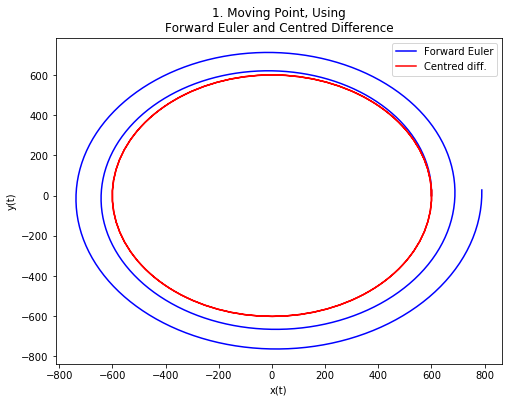

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(coords_1a[0], coords_1a[1], 'b', label="Forward Euler")
plt.plot(coords_1b[0], coords_1b[1], 'r', label="Centred diff.")
plt.title("1. Moving Point, Using\nForward Euler and Centred Difference")
plt.xlabel("x(t)")
plt.ylabel("y(t)")
plt.legend()

Since the equations describe a point moving along a circle, the point should move along the circle and not start leaving its orbit. If that is the case, it seems that at every iteration the Forward Euler algorithm has a large enough error such that the generated data points $(x_n, y_n)$ are diverging from its "expected" behaviour as $n \rightarrow \infty$. In other words, it seems that the Centred Difference method does a better job at understanding how a point moves along a circle than Forward Euler.

## 2

For Forward Euler, the function has been coded above as ```forward_euler``` and it can be used. However, for Backward Euler, some algebraic manipulations have to be made.

Let $\frac{dv}{dt} = \dot{v}$ and $\frac{d \theta}{dt} = \dot{\theta}$ be used as notation. Then, $\dot{v} = -g \sin \theta$ and $\dot{\theta} = \frac{v}{L}$. The general formula for Backward Euler is similar to the Forward Euler formula: $v_{n+1} = v_n + \Delta t\cdot \underbrace{f(v_{n+1}, \theta_{n+1})}_{\dot{v}}$ and $\theta_{n+1} = \theta_n + \Delta t\cdot \underbrace{g(v_{n+1}, \theta_{n+1})}_{\dot{\theta}}$ are implicit formulae. <br/>
However, observe that $\theta_{n+1} = \theta_n + \Delta t\cdot g(v_{n+1}, \theta_{n+1}) = \theta_n + \Delta t \cdot \frac{v_{n+1}}{L}$ is linear. Hence, substituting this equation into the other, we obtain:

\begin{align}
    v_{n+1} &= v_n + \Delta t\cdot f(v_{n+1}, \theta_{n+1})\\
    &= v_n + \Delta t \cdot \big(-g \sin \theta_{n+1} \big) \\
    &= v_n + \Delta t \cdot \big(-g \sin (\theta_n + \Delta t \cdot \frac{v_{n+1}}{L})\big)\\
    \Leftrightarrow 0 &= \underbrace{v_{n+1}-v_n - \Delta t \cdot \big(-g \sin (\theta_n + \Delta t \cdot \frac{v_{n+1}}{L})\big)}_{\phi(v_{n+1})}\\
    \Rightarrow \phi(v_{n+1})& = v_{n+1}-v_n + \Delta t \cdot \big(g \sin (\theta_n + \Delta t \cdot \frac{v_{n+1}}{L})\big)
\end{align}

Indeed, since $v_n$ and $\theta_n$ will be known when computing for $v_{n+1}$ and $\theta_{n+1}$, $v_{n+1}$ can be succesfully written as a function $\phi$ which is only a function of $v_{n+1}$ itself. Hence, one can use a fixed-point iteration (such as Newton-Raphson) to find the value of $v_{n+1}$ and easily $\theta_{n+1}$ after.

$\phi'(v_{n+1}) = 1 + \Delta t \cdot \Big(g \cos\big(\theta_n + \Delta_t\cdot \frac{v_{n+1}}{L}\big)\cdot \frac{\Delta t}{L}\Big)=1 +\frac{\Delta t^2g}{L}\cos\big(\theta_n + \frac{\Delta t \, v_{n+1}}{L}\big)$ <br/>
$\Rightarrow v_{{n+1}_{j+1}} = v_{{n+1}_j} - \frac{\phi(v_{{n+1}_j})}{\phi'(v_{{n+1}_j})}$ to find $v_{n+1}$.

In [5]:
def newton_raphson(x_n, f, fprime, tol=1e-6):
    x_n_plus_1 = x_n - f(x_n)/fprime(x_n)
    
    if np.abs(x_n_plus_1 - x_n) < tol:
        return x_n_plus_1
    else:
        return newton_raphson(x_n_plus_1, f, fprime, tol)


def backward_euler(coord, constants, n):
    # v_n_j = v_(n+1)_j
    # prev  = (v_n, theta_n)
    
    v_n, theta_n = coord
    g, delta_t, L = constants
    
    theta_n_plus_1 = theta_n + delta_t*v_n/L
    
    phi = lambda v: v - v_n + delta_t*(g*np.sin(theta_n_plus_1))
    phi_prime = lambda v: 1 + (delta_t**2)*g*np.cos(theta_n_plus_1)/L
    
    v_n_plus_1 = newton_raphson(v_n, phi, phi_prime)
    test = newton_raphson(-10, phi, phi_prime)
    # best initial guess for v_n_plus_1 is v_n
    
    assert np.abs(v_n_plus_1 - test) < 1e-5
    # sanity check
    
    
    if n == 1:
        return [coord, (v_n_plus_1, theta_n_plus_1)]
    else:
        return [coord] + backward_euler((v_n_plus_1, theta_n_plus_1), constants, n-1)

In [6]:
g = 9.81; L = 9; v0 = 0.6; theta0 = 0
t_axis_3 = np.linspace(0, 25, 25/0.1+1) # for plotting

f_2 = lambda v, theta: -g*np.sin(theta)
g_2 = lambda v, theta: v/L

coords_2a = list(map(list, zip(*forward_euler((v0, theta0), f_2, g_2, (25, 0, 0.1)))))
coords_2b = list(map(list, zip(*backward_euler((v0, theta0), (g, 0.1, 9), 25/0.1))))

/Users/Shamalama/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


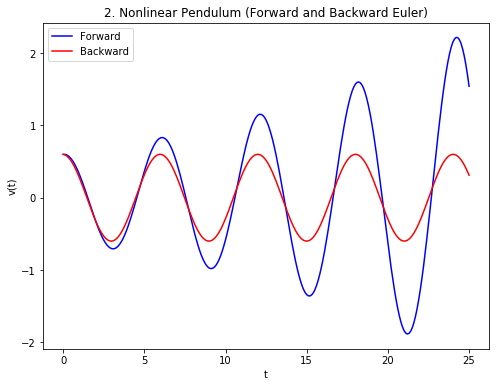

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(t_axis_3, coords_2a[0], 'b', label="Forward")
plt.plot(t_axis_3, coords_2b[0], 'r', label="Backward")
plt.title("2. Nonlinear Pendulum (Forward and Backward Euler)")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend()

Indeed, as we can see, the results generated by the forward Euler method showcase that the amplitude is increasing in $t$. However, for Backward Euler, the amplitude stays constant. Assuming that the pendulum swings in a frictionless environment, its amplitude should remain constant. A hypothesis for the increasing amplitude effect generated by using the Forward Euler method is that the error of this method is proportional to the step-size $h$; the error for Backward Euler is well-known to be proportional to $h^2$. Moreover, Backwards Euler is an implicit formula, whereas Forward Euler is an explicit formula for $x_{n+1}, y_{n+1}$. Because of this, when the algorithms are generating data points at turning points, i.e. when $\theta_n \approx \pi$, it can be hypothesized that the Forward Euler algorithm doesn't aller the graph to "turn" as well as the Backward Euler algorithm.<br/>
However, all of this is a hypothesis.

## 3

The Improved Euler Method has the following general equation: $y_{n+1} = y_n + h \cdot \Big(\frac{f(t_n, y_n) + f\big(t_n + h, \, y_n + h \cdot f(t_n, y_n)\big)}{2}\Big)$. Let us call $y_n + h \cdot f(t_n, y_n)$ the "improved" dx_dt, i.e. ```imp_dx_dt```.

In [8]:
def improved_euler(coord, h, constants, n):
    x_n, y_n, z_n = coord
    sigma, beta, rho = constants 
    
    x_prime = lambda x, y, z: sigma*(y - x)
    y_prime = lambda x, y, z: x*(rho - z) - y
    z_prime = lambda x, y, z: x*y - beta*z
    
    dx_dt = x_prime(x_n, y_n, z_n)
    dy_dt = y_prime(x_n, y_n, z_n)
    dz_dt = z_prime(x_n, y_n, z_n)
    
    x_new = x_n + h*dx_dt
    y_new = y_n + h*dy_dt
    z_new = z_n + h*dz_dt
    
    imp_dx_dt = x_prime(x_new, y_new, z_new)
    imp_dy_dt = y_prime(x_new, y_new, z_new)
    imp_dz_dt = z_prime(x_new, y_new, z_new)
    
    x_n_plus_1 = x_n + h*(dx_dt + imp_dx_dt)/2
    y_n_plus_1 = y_n + h*(dy_dt + imp_dy_dt)/2
    z_n_plus_1 = z_n + h*(dz_dt + imp_dz_dt)/2
    
    if n==1:
        return [(x_n, y_n, z_n), (x_n_plus_1, y_n_plus_1, z_n_plus_1)]
    else:
        return [(x_n, y_n, z_n)] + improved_euler((x_n_plus_1, y_n_plus_1, z_n_plus_1), h, constants, n-1)

In [9]:
sigma = 10; beta = 8/3; rho = 28
x0 = 1; y0 = -1; z0 = 30

coords_3 = list(map(list, zip(*improved_euler((x0, y0, z0), 0.005, (sigma, beta, rho), 20000))))

/Users/Shamalama/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


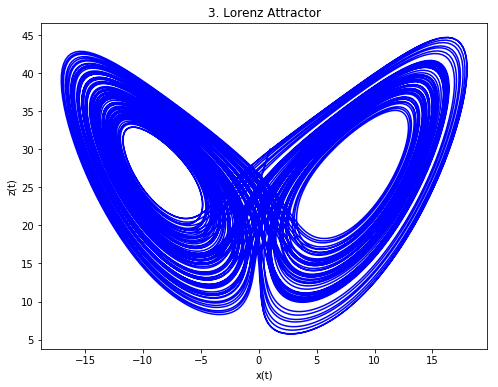

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(coords_3[0], coords_3[2], 'b')
plt.title("3. Lorenz Attractor")
plt.xlabel("x(t)")
plt.ylabel("z(t)")
plt.legend()

## 4

For homogeneous second order linear differential equations $ay'' + by' + c = 0$ where $a, b, c \in \mathbb{R}$, an analytic solution to the differential equation can be found by finding the roots of $ar^2 + br + c=0$. If roots $r_1, r_2$ are:
- distinct and real, then general solution $y(t)=c_1 e^{r_1 t} + c_2 e^{r_2 t}$
- equal, then general solution $y(t) = c_1 e^{rt} + c_2 x e^{rt}$
- complex, i.e. $r_1 = \alpha + \beta \cdot i, \, \, r_2 = \alpha - \beta \cdot i$, then general solution $y(t)=e^{\alpha t}\big(c_1 \cos(\beta t)+c_2\sin (\beta t)\big)$ <br/>
<br/>
where, in any of the cases above, $c_1, c_2$ can be obtained by using two initial condition values. Also, note that $\alpha > 0, \beta >0$.

In this case, the differential equation is $y''+2y'+9y=0$ and $y(0)=0, y'(0)=1$. Observe that:
$$r^2 + 2r + 9 = 0 \Rightarrow r = \frac{-2 \pm \sqrt{2^2 - 4\cdot 9\cdot 1}}{2\cdot 1} = -1 \pm 2\cdot \sqrt{-2}
= \underbrace{-1}_{\alpha} \pm \underbrace{2\sqrt{2}}_{\beta}i$$

Thus, since $r_1 = -1 + 2\sqrt{2}i, \, r_2 = -1 - 2\sqrt{2}i$, as a result $y(t) = e^{-t}\big(c_1 \cos(2\sqrt{2}t)+c_2 \sin(2\sqrt{2}t)\big)$. Moreover:
$$y'(t) = -e^{-t}\big(c_1 \cos(2\sqrt{2}t)+c_2 \sin(2\sqrt{2}t)\big) + e^{-t}\big(c_1 2\sqrt{2}(-1) \sin(2\sqrt{2}t)+c_2 2\sqrt{2}\cos(2\sqrt{2}t)\big)$$
$$e^{-t}\Big(\big(-c_2-2\sqrt{2}c_1\big)\sin(2\sqrt{2}t) + \big(2\sqrt{2}c_2 - c_1\big)\cos(2\sqrt{2}t)\Big)$$

$$y'(t) = -e^{-t}\big(c_1 \cos(2\sqrt{2}t)+c_2 \sin(2\sqrt{2}t)\big) + e^{-t}\big(c_1 2\sqrt{2}(-1) \sin(2\sqrt{2}t)+c_2 2\sqrt{2}\cos(2\sqrt{2}t)\big)$$
    $$= e^{-t}\Big(\big(-c_2-2\sqrt{2}c_1\big)\sin(2\sqrt{2}t) + \big(2\sqrt{2}c_2 - c_1\big)\cos(2\sqrt{2}t)\Big)$$

In the end, $y(0)=c_1=0$ and $y'(0) = 2\sqrt{2}c_2 = 1 \Rightarrow c_1 = 0, c_2 = \frac{1}{2\sqrt{2}}$. The analytic general solution to the differential equation is: $$y(t) = e^{-t}\big(c_1 \cos(2\sqrt{2}t)+c_2 \sin(2\sqrt{2}t)\big) =\frac{e^{-t}}{2\sqrt{2}}\sin(2 \sqrt{2}t)$$

In [11]:
analytic_sol = lambda t: np.exp(-t)*np.sin(np.sqrt(8)*t)/np.sqrt(8)

We would like to write both system of equations under the form: $A \vec{x} = \vec{b}$ where $\vec{x} =
\begin{pmatrix}
    u_n \\
    y_n
\end{pmatrix}$ and $\vec{b} =
\begin{pmatrix}
    u_{n+1}\\
    y_{n+1}
\end{pmatrix}$ and where $\dot{u} = y'', u = \dot{y}=y'$. As a result, the ODE can be rewritten as a system of two equations: $y'' + 2y' + 9y=0 \Rightarrow
\begin{cases}
    \dot{u}(u, y) = -2u - 9y\\
    \dot{y}(u, y) = u
\end{cases}$. Using a Backward Euler algorithm, it follows that: <br/>
$$\begin{cases}
    u_{n+1} = u_n + h \cdot \dot{u}\, (u_{n+1}, y_{n+1}) = u_n + h \cdot (-2u_{n+1} - 9y_{n+1}) \Leftrightarrow
    \big(1+2h\big)\cdot u_{n+1} = u_n -9hy_{n+1} &\quad (*)\\
    y_{n+1} = y_n + h \cdot \dot{y}\,(u_{n+1}, y_{n+1}) = y_n + h \cdot u_{n+1}&\quad (\dagger)
\end{cases}$$Substituting $(*)$ into $\dagger$, we can obtain that:

$\begin{align}
    &y_{n+1} = y_n + h\cdot \Big(\overbrace{\frac{1}{1+2h}u_n - \frac{9h}{1+2h}y_{n+1}}^{u_{n+1}}\Big)\\
    \Leftrightarrow& \big(1+\frac{9h^2}{1+2h}\big) y_{n+1} = \frac{h}{1+2h}u_n + y_n\\
    \Leftrightarrow& y_{n+1} = \frac{h}{1+2h+9h^2}u_n + \frac{1+2h}{1+2h+9h^2}y_n (**)
\end{align}$<br/>
<br/>
Substituting $(**)$ back into $(*)$ yields:
$\begin{cases}
    u_{n+1} &= \frac{1}{1+2h+9h^2}u_n - \frac{9h}{1+2h+9h^2}y_n\\
    y_{n+1} &= \frac{h}{1+2h+9h^2}u_n - \frac{1+2h}{1+2h+9h^2}y_n
\end{cases}\Leftrightarrow
\begin{pmatrix}
    \frac{1}{1+2h+9h^2} & \frac{9h}{1+2h+9h^2}\\
    \frac{h}{1+2h+9h^2} & \frac{1+2h}{1+2h+9h^2}
\end{pmatrix}\cdot
\begin{pmatrix}
    u_n \\
    y_n
\end{pmatrix} = 
\begin{pmatrix}
    u_{n+1} \\
    y_{n+1}
\end{pmatrix}\Leftrightarrow
A \vec{x} = \vec{b}$

In [12]:
def matrix_4(h):
    denom = 9*(h**2) + 2*h + 1
    return np.array([[1/denom, -9*h/denom], [h/denom, 1-(9*(h**2)/denom)]])

def num_sol_ode(coords, h, current_h, max_t):
    # u_n, y_n = coords (not needed)
    
    u_n_plus_1, y_n_plus_1 = tuple(matrix_4(h)@np.array(coords))
    
    if current_h + h > max_t:
        return [coords]
    
    else:
        return [coords] + num_sol_ode((u_n_plus_1, y_n_plus_1), h, current_h+h, max_t)

In [13]:
# test for multiple h values:
#    using h=1e-4 will kill the kernel
h_values = [5e-4, 1e-3, 4e-2, 1e-2, 1e-1]

y_0 = 0; y_prime_0 = 1
t_axis_4 = {}
coords_4 = {}

for h in h_values:
    t_axis_4[h] = np.linspace(0, np.pi, int(np.pi/h)+1)
    coords_4[h] = list(map(list, zip(*num_sol_ode((y_prime_0, y_0), h, 0, np.pi))))
    
y_values_4 = [analytic_sol(t_n) for t_n in t_axis_4[min(h_values)]]

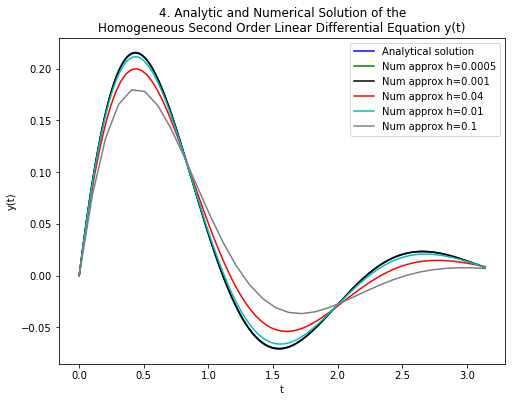

In [14]:
colours = ['g', 'k', 'r', 'c', '0.5']

plt.figure(figsize=(8, 6))
plt.plot(t_axis_4[min(h_values)], y_values_4, 'b', label="Analytical solution")

for h in h_values:
    plt.plot(t_axis_4[h], coords_4[h][1], colours[h_values.index(h)], label="Num approx h=" + str(h))
    plt.title("4. Analytic and Numerical Solution of the\nHomogeneous Second Order Linear Differential Equation y(t)")
    plt.xlabel("t")
    plt.ylabel("y(t)")
plt.legend()